In [1]:
# Import our modules
import matplotlib.pyplot as plt
from astropy.units import Quantity
import numpy as np
import pandas as pd
import os

import xga
# Import the source classes from XGA
# from xga.sources import BaseSource, NullSource, ExtendedSource, PointSource, GalaxyCluster
# Import an example sample class
from xga.samples.extended import ClusterSample, GalaxyCluster
# Get evtool
from xga.generate.esass.phot import evtool_image, expmap
from xga.xspec import single_temp_apec
from xga.generate.esass.spec import srctool_spectrum

# from multiprocess import Pool
# os.environ['OMP_NUM_THREADS'] = '1'
print('imports done')

/Users/ko23871/Documents/XGA/xga/utils.py:39: DeprecationWarning: The XGA 'find_all_wcs' function should be imported from imagetools.misc, in the future it will be removed from utils.
  warn(message, DeprecationWarning)
/Users/ko23871/Documents/XGA/xga/utils.py:635: UserWarning: SAS_DIR environment variable is not set, unable to verify SAS is present on system, as such all functions in xga.sas will not work.
  warn("SAS_DIR environment variable is not set, unable to verify SAS is present on system, as such "
/Users/ko23871/Documents/XGA/xga/__init__.py:6: UserWarning: No CIAO installation detected on system, as such all functions in xga.generate.ciao will not work.
  from .utils import xga_conf, CENSUS, OUTPUT, NUM_CORES, XGA_EXTRACT, BASE_XSPEC_SCRIPT, MODEL_PARS, \


NameError: name 'split_out' is not defined

In [3]:
# Check the ESASS_VERSION
xga.ESASS_VERSION

'ESASS4DR1'

In [4]:
# Demo cluster src
demo_src = GalaxyCluster(155.9158041, 4.185566711, 0.2891, 'eRASS18',
                         r500=Quantity(1500, 'kpc'),
                         search_distance={'erosita': Quantity(3, 'deg')},
                         clean_obs=False, use_peak=False, load_products=False)  #, num_cores=1)

/Users/ko23871/Documents/XGA/xga/sources/base.py:188: UserWarning: A dictionary of search distances that did not contain all requested telescopes has been passed, default values have been used for the missing telescopes.
  matches, excluded = separation_match(ra, dec, search_distance, telescope)
/Users/ko23871/Documents/XGA/xga/sources/general.py:178: DeprecationWarning: Bitwise inversion '~' on bool is deprecated. This returns the bitwise inversion of the underlying int object and is usually not what you expect from negating a bool. Use the 'not' operator for boolean negation or ~int(x) if you really want the bitwise inversion of the underlying int.
  flat_det = [~self._detected[tel][o] for tel in self._detected for o in self._detected[tel]]
Generating products of type(s) combined events: 100%|█| 1/1 [00:00<00:00,  1.49it
Generating products of type(s) expmap: 100%|██████| 1/1 [02:17<00:00, 137.46s/it]


In [5]:
demo_src.info()


-----------------------------------------------------
Source Name - eRASS18
User Coordinates - (155.9158041, 4.185566711) degrees
nH - 0.0222 1e+22 / cm2
Redshift - 0.289
R500 - 1500.0 kpc

-- eROSITA --
ObsIDs - 2
TM1 Observations - 2
TM2 Observations - 2
TM3 Observations - 2
TM4 Observations - 2
TM5 Observations - 2
TM6 Observations - 2
TM7 Observations - 2
With initial detection - 0
Total exposure - 0.1 ks
Spectra associated - 0
-----------------------------------------------------



In [6]:
demo_src._products

dict_keys(['tm1', 'tm2', 'tm3', 'tm4', 'tm5', 'tm6', 'tm7', 'combined'])

In [7]:
demo_src.get_products('image')

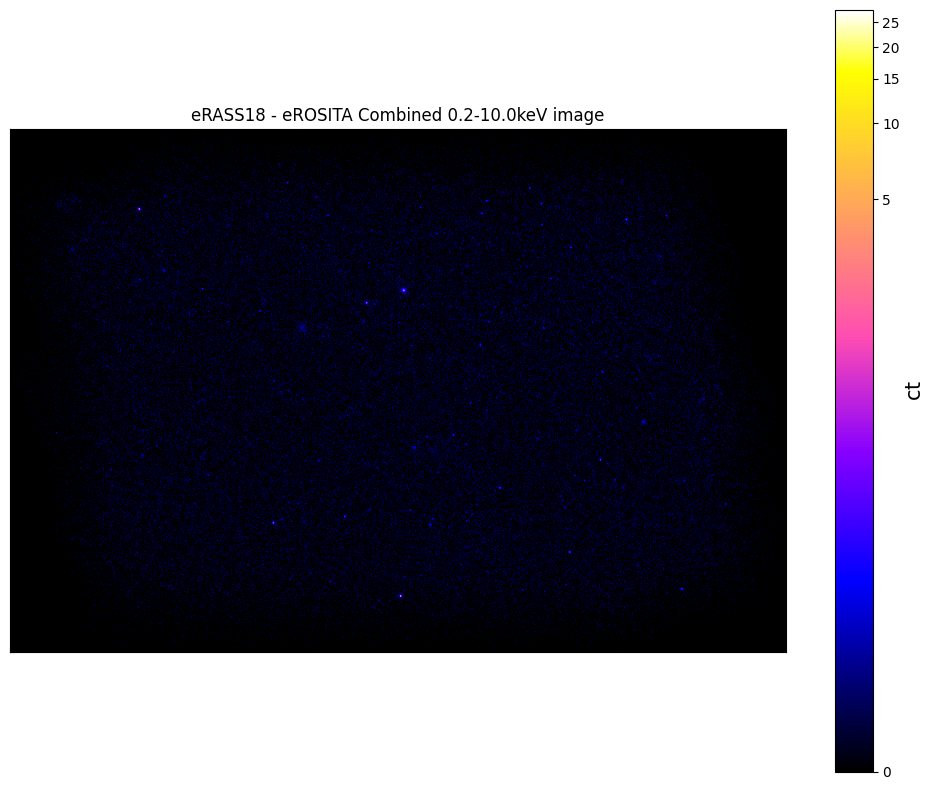

In [8]:
combined_image = demo_src.get_products('combined_image')
combined_image[0].view()

In [9]:
# Generate some products
demo_src = evtool_image(demo_src)
demo_src = srctool_spectrum(demo_src,'r500')

[array(['cd /Users/ko23871/Documents/xga_tests/xga_output/erosita/combined/temp_srctool_49107346; srctool eventfiles="/Users/ko23871/Documents/xga_tests/xga_output/erosita/combined/81785100_merged_events.fits" srccoord="icrs;155.9158041, 4.185566711" todo="SPEC ARF RMF" srcreg="circle 155.9158041 4.185566711 0.09598588968178272d" backreg=NONE tstep=0.5 insts="1 2 3 4 5 6 7" psftype=NONE extmap="/Users/ko23871/Documents/xga_tests/xga_output/erosita/combined/16989942_0.2-10.0keVimg.fits" exttype="MAP";mv srctoolout_0??_SourceSpec* 49107346_combined_eRASS18_ra155.9158041_dec4.185566711_ri0.0_ro0.09598588968178272_mincnt5_spec_not_grouped.fits;mv srctoolout_0??_RMF* 49107346_combined_eRASS18_ra155.9158041_dec4.185566711_ri0.0_ro0.09598588968178272_grpTrue_mincnt5.rmf;mv srctoolout_0??_ARF* 49107346_combined_eRASS18_ra155.9158041_dec4.185566711_ri0.0_ro0.09598588968178272_grpTrue_mincnt5.arf;rm *srctoolout_*;srctool eventfiles="/Users/ko23871/Documents/xga_tests/xga_output/erosita/combined/

Generating products of type(s) spectrum: 100%|█████| 1/1 [00:41<00:00, 41.18s/it]


In [10]:
demo_src._products

{'erosita': {'155087': {'combined': {'events': <xga.products.misc.EventList at 0x107ac5250>,
    'bound_0.2-10.0': {'image': <xga.products.phot.Image at 0x13f1dcad0>,
     'expmap': <xga.products.phot.ExpMap at 0x13f1df230>,
     'ratemap': <xga.products.phot.RateMap at 0x13f201070>},
    'bound_0.5-2.0': {'image': <xga.products.phot.Image at 0x13f1dcfe0>,
     'expmap': <xga.products.phot.ExpMap at 0x13f203fb0>,
     'ratemap': <xga.products.phot.RateMap at 0x13f222c30>},
    'bound_2.0-10.0': {'image': <xga.products.phot.Image at 0x13f11ec30>,
     'expmap': <xga.products.phot.ExpMap at 0x13f2369c0>,
     'ratemap': <xga.products.phot.RateMap at 0x13f237b00>}},
   'tm1': {},
   'tm2': {},
   'tm3': {},
   'tm4': {},
   'tm5': {},
   'tm6': {},
   'tm7': {}},
  '158087': {'combined': {'events': <xga.products.misc.EventList at 0x13f256660>,
    'bound_0.2-10.0': {'image': <xga.products.phot.Image at 0x13f1dd520>,
     'expmap': <xga.products.phot.ExpMap at 0x13f2578c0>,
     'ratemap':

In [11]:
demo_src = single_temp_apec(demo_src, 'r500')

[array(['cd /Users/ko23871/Documents/xga_tests/xga_output/erosita/combined/temp_srctool_19699532; srctool eventfiles="/Users/ko23871/Documents/xga_tests/xga_output/erosita/combined/81785100_merged_events.fits" srccoord="icrs;155.9158041, 4.185566711" todo="SPEC ARF RMF" srcreg="circle 155.9158041 4.185566711 0.09598588968178272d" backreg=NONE tstep=0.5 insts=1 psftype=NONE extmap="/Users/ko23871/Documents/xga_tests/xga_output/erosita/combined/16989942_0.2-10.0keVimg.fits" exttype="MAP";mv srctoolout_1??_SourceSpec* 19699532_tm1_eRASS18_ra155.9158041_dec4.185566711_ri0.0_ro0.09598588968178272_mincnt5_spec_not_grouped.fits;mv srctoolout_1??_RMF* 19699532_tm1_eRASS18_ra155.9158041_dec4.185566711_ri0.0_ro0.09598588968178272_grpTrue_mincnt5.rmf;mv srctoolout_1??_ARF* 19699532_tm1_eRASS18_ra155.9158041_dec4.185566711_ri0.0_ro0.09598588968178272_grpTrue_mincnt5.arf;rm *srctoolout_0*;rm *srctoolout_8*;srctool eventfiles="/Users/ko23871/Documents/xga_tests/xga_output/erosita/combined/81785100_m

Running XSPEC Fits:   0%|                                  | 0/1 [00:00<?, ?it/s]/Users/ko23871/Documents/XGA/xga/utils.py:39: DeprecationWarning: The XGA 'find_all_wcs' function should be imported from imagetools.misc, in the future it will be removed from utils.
  warn(message, DeprecationWarning)
/Users/ko23871/Documents/XGA/xga/utils.py:635: UserWarning: SAS_DIR environment variable is not set, unable to verify SAS is present on system, as such all functions in xga.sas will not work.
  warn("SAS_DIR environment variable is not set, unable to verify SAS is present on system, as such "
/Users/ko23871/Documents/XGA/xga/__init__.py:6: UserWarning: No CIAO installation detected on system, as such all functions in xga.generate.ciao will not work.
  from .utils import xga_conf, CENSUS, OUTPUT, NUM_CORES, XGA_EXTRACT, BASE_XSPEC_SCRIPT, MODEL_PARS, \
/Users/ko23871/Documents/XGA/xga/__init__.py:6: UserWarning: A Chandra CALDB installation cannot be identified on your system, and as such Ch

/Users/ko23871/Documents/xga_tests/.xga_tests/lib/python3.12/site-packages/fitsio/hdu/table.py:1290: FITSRuntimeWarning: Column 'F_CHAN': No maximum size: 'PI'. Column '%s': No maximum size: '%s'. %s
  warnings.warn(mess, FITSRuntimeWarning)
/Users/ko23871/Documents/xga_tests/.xga_tests/lib/python3.12/site-packages/fitsio/hdu/table.py:1290: FITSRuntimeWarning: Column 'N_CHAN': No maximum size: 'PI'. Column '%s': No maximum size: '%s'. %s
  warnings.warn(mess, FITSRuntimeWarning)
/Users/ko23871/Documents/xga_tests/.xga_tests/lib/python3.12/site-packages/fitsio/hdu/table.py:1290: FITSRuntimeWarning: Column 'MATRIX': No maximum size: 'PE'. Column '%s': No maximum size: '%s'. %s
  warnings.warn(mess, FITSRuntimeWarning)


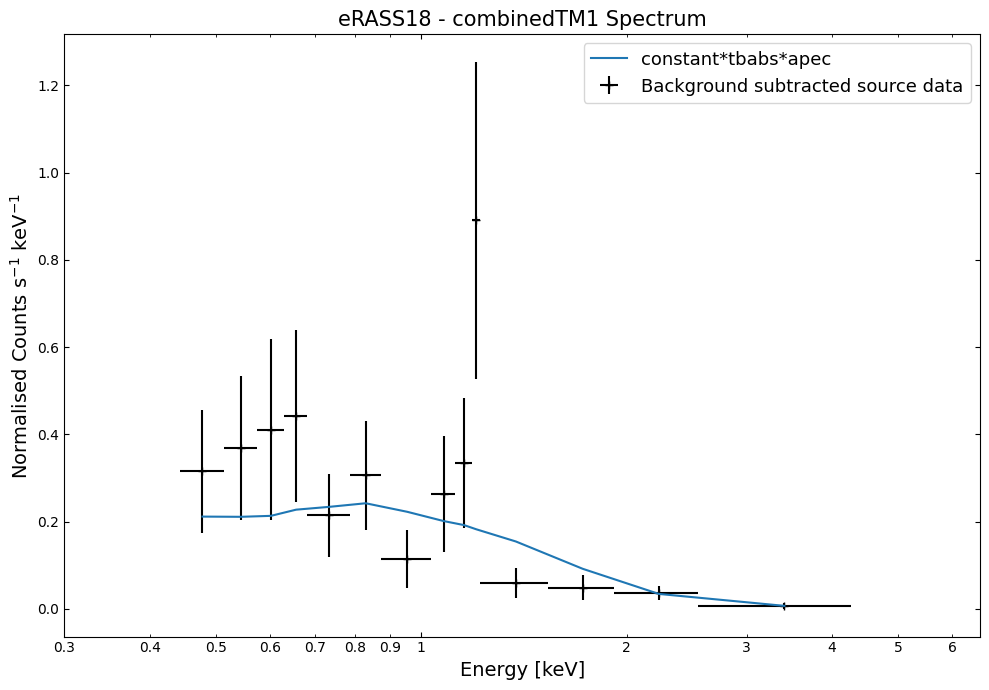

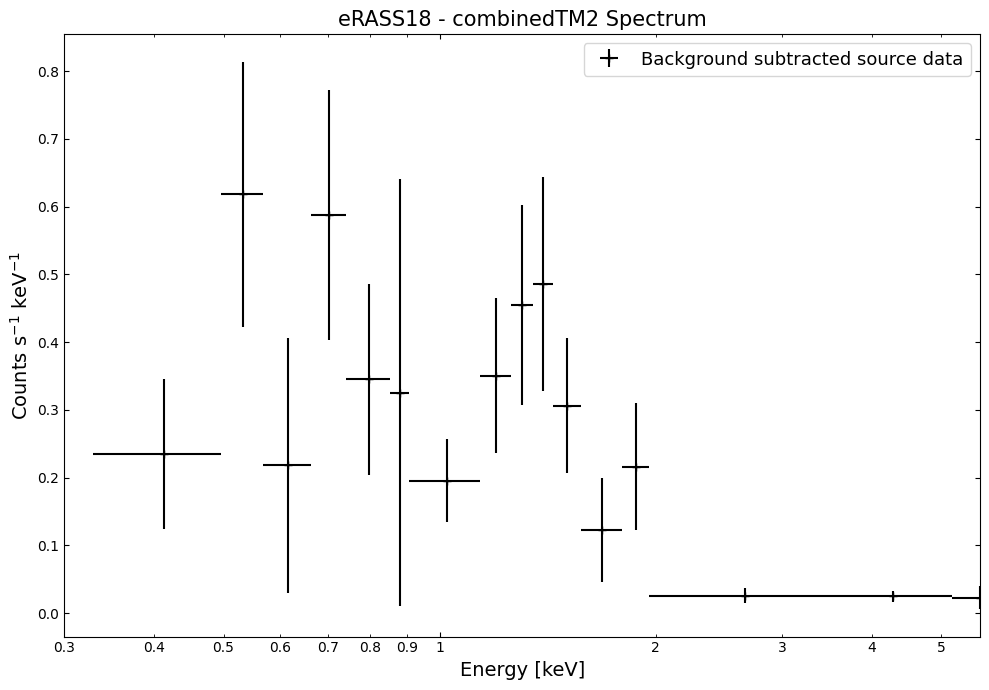

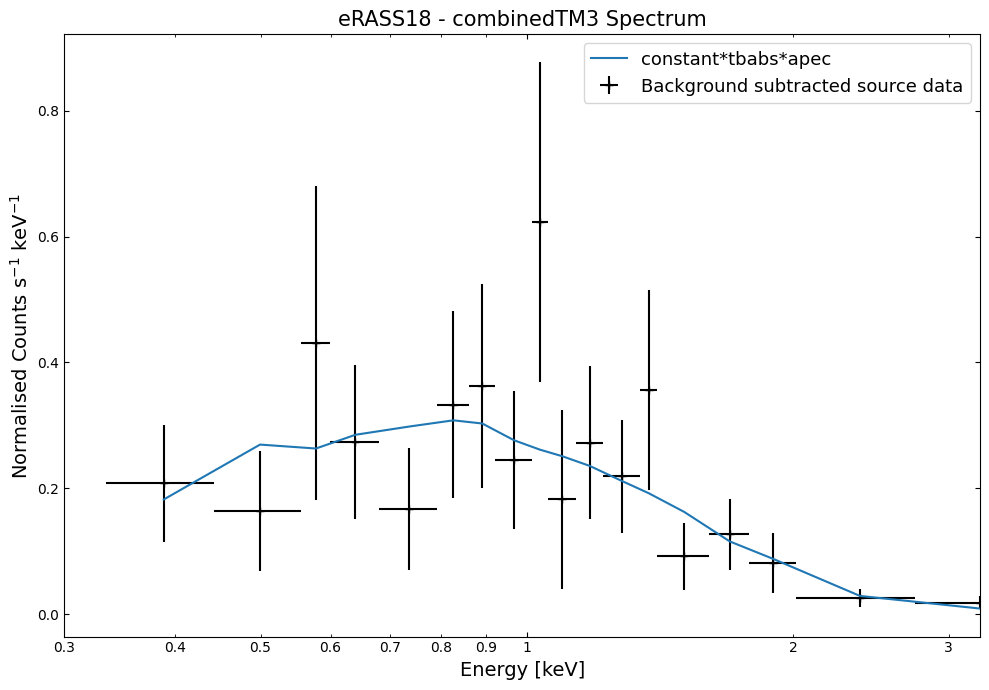

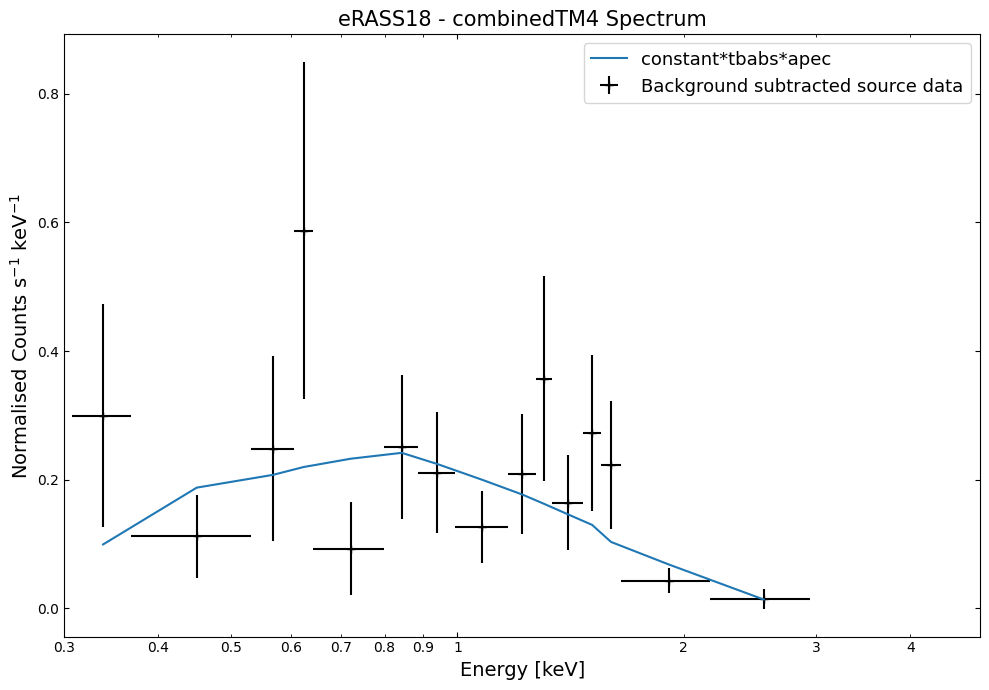

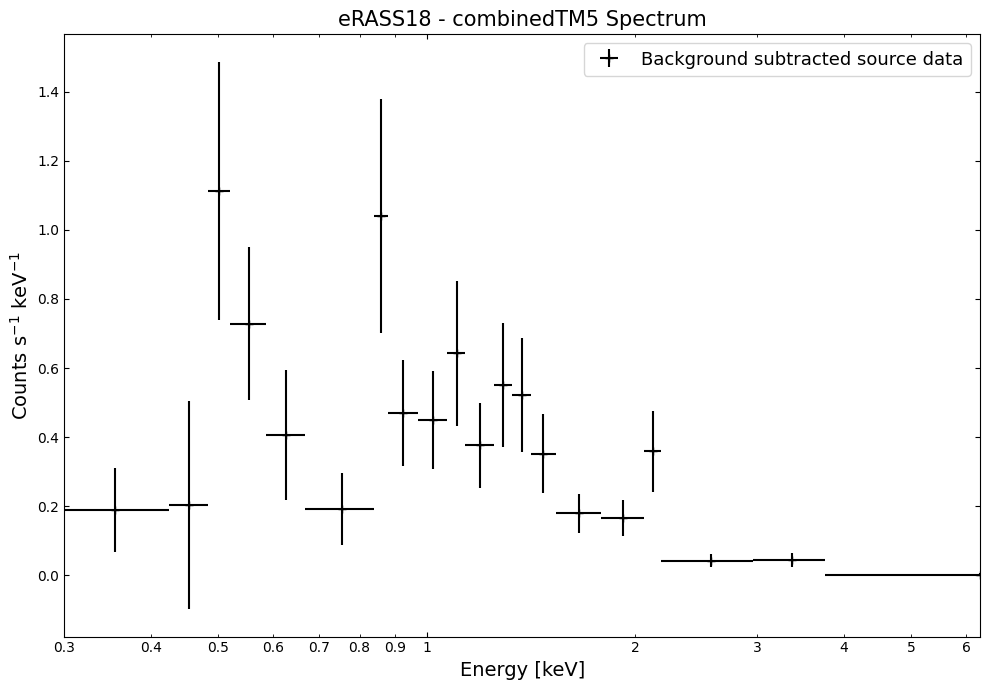

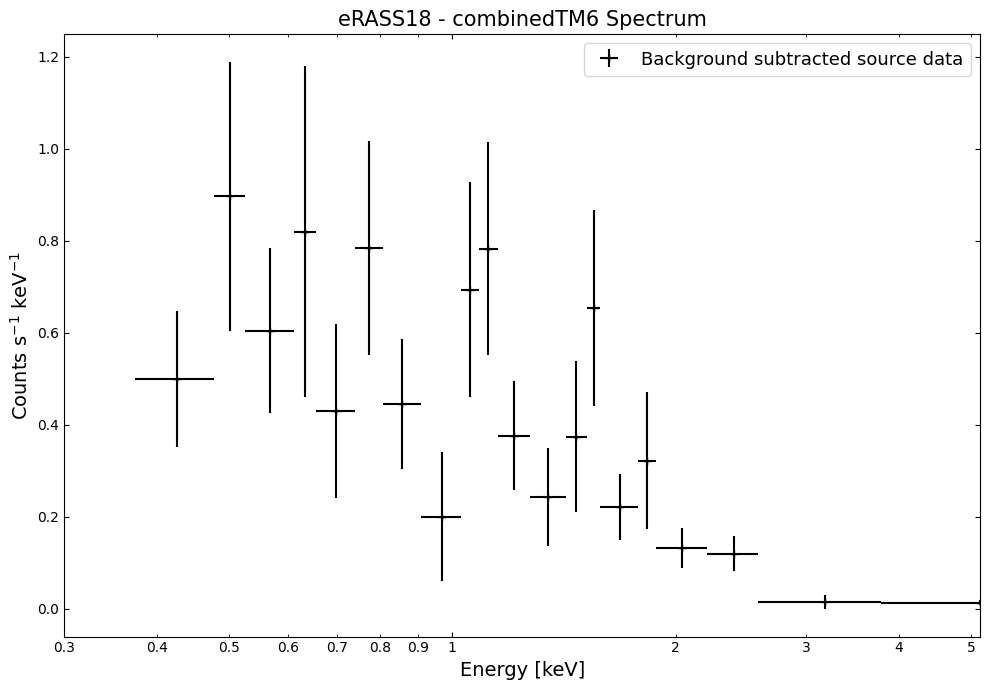

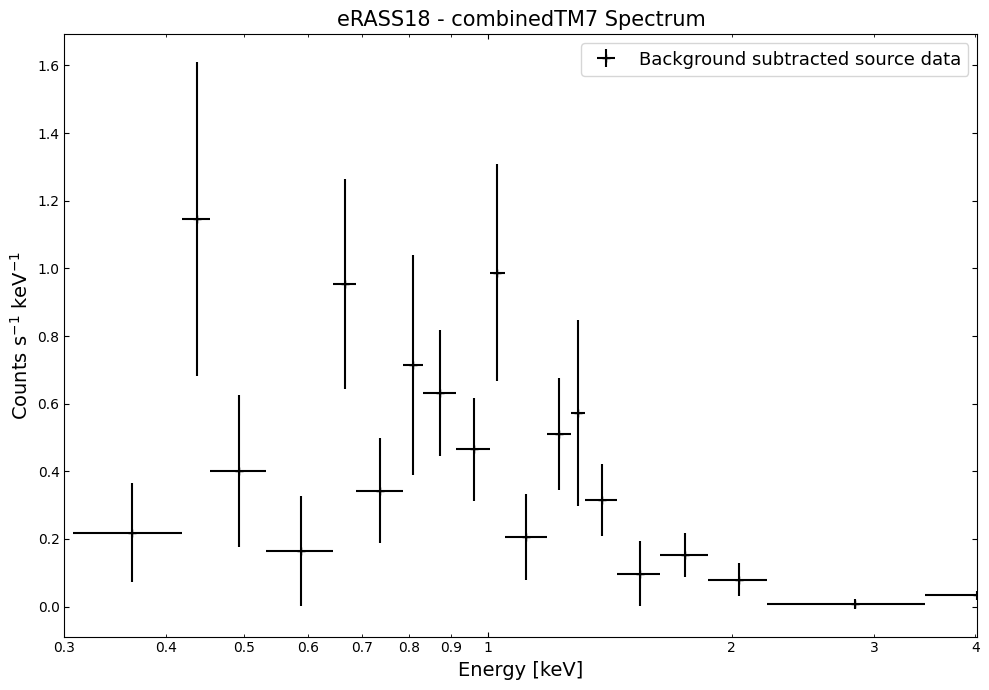

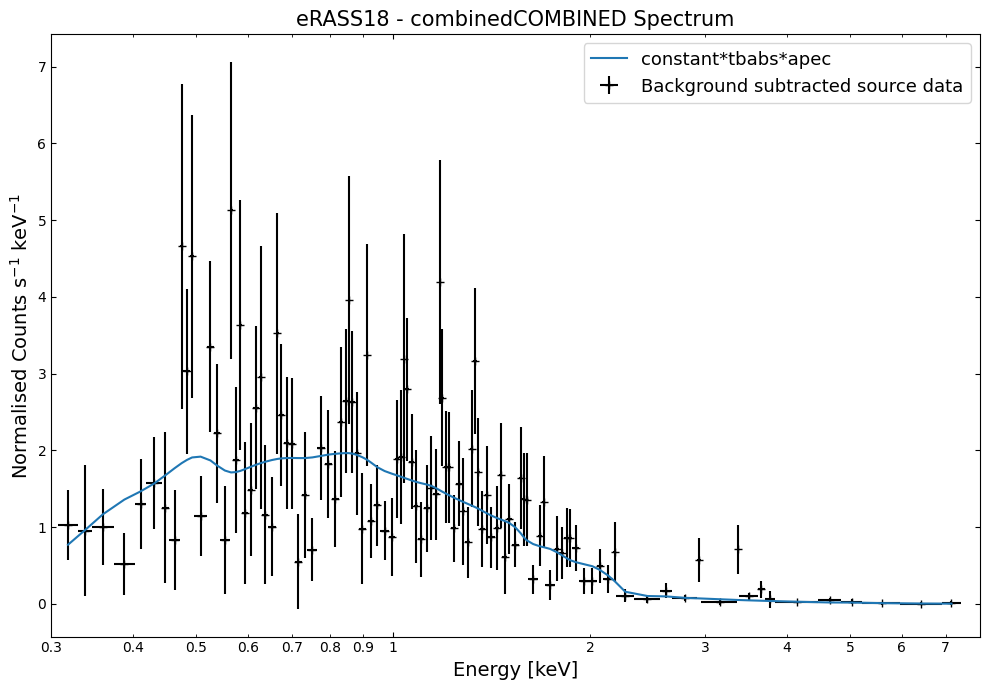

In [12]:
for sp in demo_src.get_spectra('r500', 'combined'):
    sp.view()

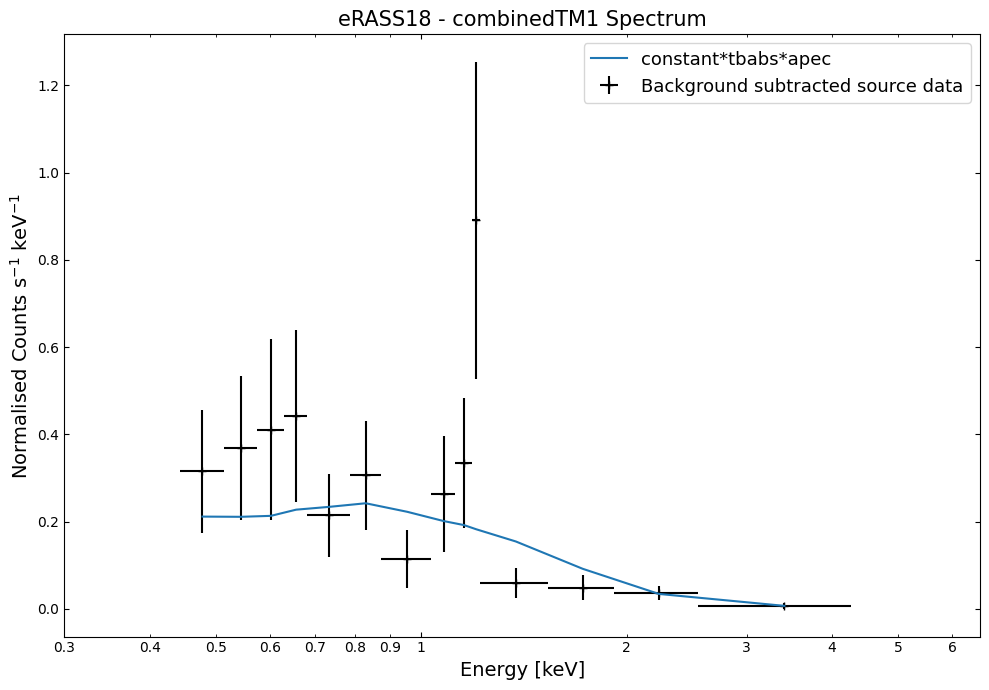

In [13]:
demo_src.get_combined_spectra('r500')[0].view(grouped=1)

In [14]:
demo_src.get_results('r500', 'erosita', stacked_spectra=True)

{'kT': array([6.91448365, 1.57215922, 2.52806958]),
 'norm': array([0.0111404 , 0.00147199, 0.00157498]),
 'factor': array([[1.206815  , 0.19930376, 0.2424912 ],
        [0.95708987, 0.17694739, 0.20378077],
        [1.07615973, 0.14111136, 0.17203919]])}

In [15]:
demo_src.get_temperature('r500', 'erosita', stacked_spectra=True)

<Quantity [6.91448365, 1.57215922, 2.52806958] keV>

In [16]:
print(demo_src.get_luminosities('r500', 'erosita', 'constant*tbabs*apec', stacked_spectra=True))

{'bound_0.5-2.0': <Quantity [1.07333387e+45, 9.27608752e+43, 5.60701534e+43] erg / s>, 'bound_0.01-100.0': <Quantity [3.89925052e+45, 7.64670940e+44, 4.45220520e+44] erg / s>}


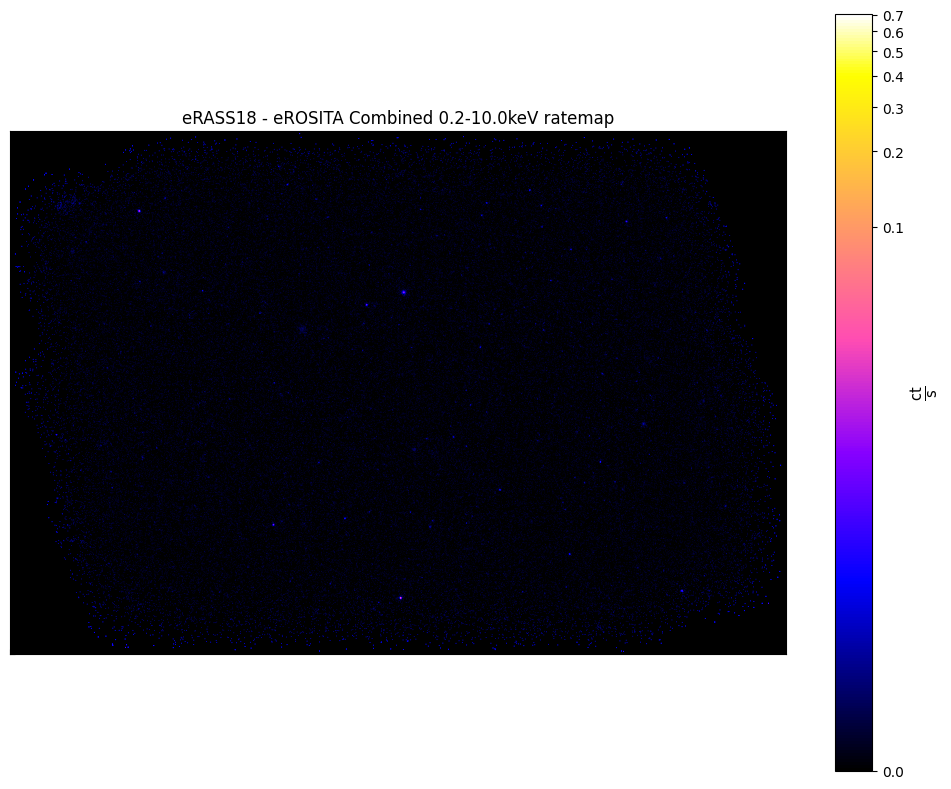

In [17]:
rt = demo_src.get_combined_ratemaps(psf_corr=False)
rt.view()

In [18]:
demo_src._products

{'erosita': {'155087': {'combined': {'events': <xga.products.misc.EventList at 0x107ac5250>,
    'bound_0.2-10.0': {'image': <xga.products.phot.Image at 0x13f1dcad0>,
     'expmap': <xga.products.phot.ExpMap at 0x13f1df230>,
     'ratemap': <xga.products.phot.RateMap at 0x13f201070>},
    'bound_0.5-2.0': {'image': <xga.products.phot.Image at 0x13f1dcfe0>,
     'expmap': <xga.products.phot.ExpMap at 0x13f203fb0>,
     'ratemap': <xga.products.phot.RateMap at 0x13f222c30>},
    'bound_2.0-10.0': {'image': <xga.products.phot.Image at 0x13f11ec30>,
     'expmap': <xga.products.phot.ExpMap at 0x13f2369c0>,
     'ratemap': <xga.products.phot.RateMap at 0x13f237b00>}},
   'tm1': {},
   'tm2': {},
   'tm3': {},
   'tm4': {},
   'tm5': {},
   'tm6': {},
   'tm7': {}},
  '158087': {'combined': {'events': <xga.products.misc.EventList at 0x13f256660>,
    'bound_0.2-10.0': {'image': <xga.products.phot.Image at 0x13f1dd520>,
     'expmap': <xga.products.phot.ExpMap at 0x13f2578c0>,
     'ratemap':

In [34]:
from xga.samples import ClusterSample
from xga.sourcetools.density import inv_abel_fitted_model, ann_spectra_apec_norm
from xga.imagetools.psf import rl_psf
from xga.models import KingProfile1D, SimpleVikhlininDensity1D

from astropy.units import Quantity
import numpy as np
import pandas as pd

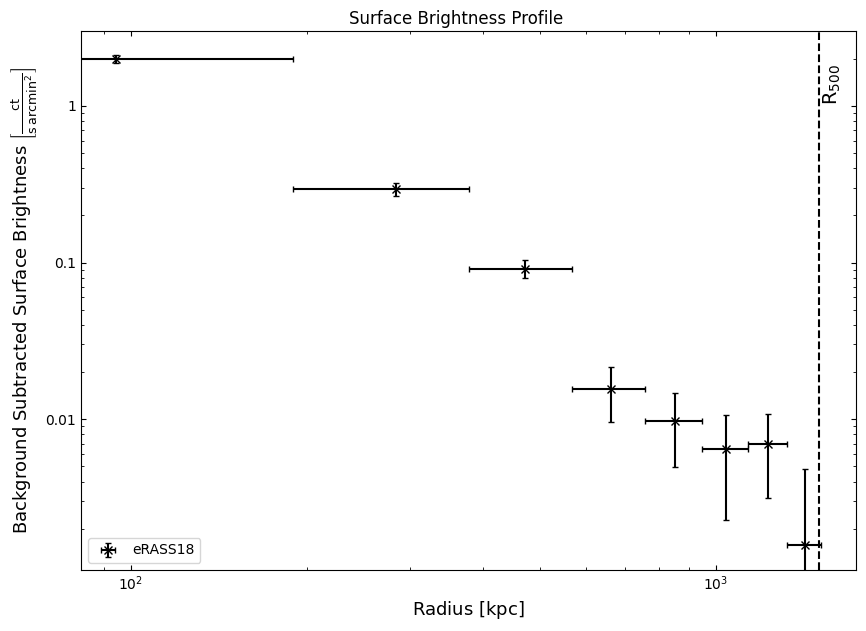

In [28]:
demo_src.view_brightness_profile('r500', 'erosita', lo_en=Quantity(0.2, 'keV'), hi_en=Quantity(10, 'keV'), pix_step=10)

In [33]:
# demo_src.get_profiles('combined_brightness', 'erosita', lo_en=Quantity(0.2, 'keV'), hi_en=Quantity(10, 'keV'))
sb_prof = demo_src.get_1d_brightness_profile('r500', 'erosita', lo_en=Quantity(0.2, 'keV'), hi_en=Quantity(10, 'keV'), 
                                             pix_step=10)
sb_prof

In [38]:
sb_d_profs = inv_abel_fitted_model(demo_src, 'beta', outer_radius=1.2*demo_src.r500, conv_outer_radius='r500',
                                   num_steps=2000)
sb_d_profs

[array([], dtype=float64)]


NoProductAvailableError: Cannot find any spectra matching your input.

In [37]:
import pdb

In [39]:
pdb.pm()

> /Users/ko23871/Documents/XGA/xga/sources/base.py(3251)_get_spec_prod()
   3249             matched_prods = matched_prods[0]
   3250         elif len(matched_prods) == 0:
-> 3251             raise NoProductAvailableError("Cannot find any spectra matching your input.")
   3252 
   3253         return matched_prods



ipdb>  locals()


{'self': <xga.sources.extended.GalaxyCluster object at 0x13dfbb440>, 'outer_radius': 'r500', 'obs_id': None, 'inst': None, 'inner_radius': <Quantity 0. arcsec>, 'group_spec': True, 'min_counts': 5, 'min_sn': None, 'over_sample': None, 'telescope': 'erosita', 'inn_rad_num': <Quantity 0. deg>, 'out_rad_num': <Quantity 0.09598589 deg>, 'extra_name': '_mincnt5', 'spec_storage_name': 'ra155.9158041_dec4.185566711_ri0.0_ro0.09598588968178272_grpTrue_mincnt5', 'matched_prods': []}
--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user
